<a href="https://colab.research.google.com/github/Izu-33/coffee-health-stress-prediction/blob/main/linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stress Detector from Lifestyle Data

<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/8119432/12837956/c228ad25f528481a4b528463f8946656/dataset-cover.jpg?t=2025-08-22-15-29-36"
       alt="global coffee health dataset" width="800"/>
</p>

### Introduction

Stress is a growing health challenge influenced by lifestyle factors like caffeine intake, sleep, and physical activity. The Global Coffee Health Dataset (10,000 records from 20 countries) captures these patterns, making it useful for wellness-focused analysis.

### Problem Statement

This project aims to predict stress levels (Low, Medium, High) from lifestyle and health indicators. By modeling these relationships, we explore how daily habits impact well-being and show how machine learning can support stress awareness in real life.

### Dataset

The dataset used for this project is the Global Coffee Health Dataset sourced from Kaggle, which contains 10,000 synthetic records from 20 countries, capturing demographics, lifestyle habits (coffee, sleep, activity, smoking, alcohol), and health indicators (BMI, heart rate, stress).
Link to dataset: [Link](https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset/data)

## Install dependencies

In [ ]:
!pip -q install kaggle

## Load secrets

In [ ]:
from google.colab import userdata
import os

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

## Download dataset from Kaggle

In [ ]:
!kaggle datasets download -d uom190346a/global-coffee-health-dataset
!unzip global-coffee-health-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset
License(s): CC0-1.0
global-coffee-health-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  global-coffee-health-dataset.zip
replace synthetic_coffee_health_10000.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: synthetic_coffee_health_10000.csv  


## Import necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [ ]:
health_df = pd.read_csv("./synthetic_coffee_health_10000.csv")
health_df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


## Exploratory Data Analysis (EDA)

In [ ]:
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

> The feature **`Health_Issues`** has ~60% missing values and is highly correlated with stress. To avoid introducing bias and ensure model reliability, we drop this column from the analysis.
> **`Sleep_Quality`** is derived from **`Sleep_Hours`** (strongly correlated)
> **`ID`** is just a unique identifier, carries no predictive information.
> **`Coffee_Intake`** and **`Caffeine_mg`** are basically proportional. Since the dataset and problem statement is framed around health outcomes (stress, sleep, BMI, etc.), **`Caffeine_mg`** is a good choice for a feature because it is standardized and aligns better with published research.

#### Columns to drop:
- **`ID`**
- **`Health_Issues`**
- **`Sleep_Quality`** (since **`Sleep_Hours`** already covers it)
- **`Coffee_Intake`**

In [ ]:
cols_to_drop = ['ID', 'Health_Issues', 'Sleep_Quality', 'Coffee_Intake']
health_df = health_df.drop(columns=cols_to_drop)

print(health_df.shape)
print(health_df.info())
print(health_df.isnull().sum())
health_df.describe(include="all")

(10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Country                  10000 non-null  object 
 3   Caffeine_mg              10000 non-null  float64
 4   Sleep_Hours              10000 non-null  float64
 5   BMI                      10000 non-null  float64
 6   Heart_Rate               10000 non-null  int64  
 7   Stress_Level             10000 non-null  object 
 8   Physical_Activity_Hours  10000 non-null  float64
 9   Occupation               10000 non-null  object 
 10  Smoking                  10000 non-null  int64  
 11  Alcohol_Consumption      10000 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 937.6+ KB
None
Age                        0
Gender                    

,Age,Gender,Country,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.00000,10000,10000.00000,10000.000000
unique,NaN,3,20,NaN,NaN,NaN,NaN,3,NaN,5,NaN,NaN
top,NaN,Female,Canada,NaN,NaN,NaN,NaN,Low,NaN,Office,NaN,NaN
freq,NaN,5001,543,NaN,NaN,NaN,NaN,6989,NaN,2073,NaN,NaN
mean,34.949100,NaN,NaN,238.411010,6.636220,23.986860,70.617800,NaN,7.48704,NaN,0.20040,0.300700
std,11.160939,NaN,NaN,137.748815,1.222055,3.906411,9.822951,NaN,4.31518,NaN,0.40032,0.458585
min,18.000000,NaN,NaN,0.000000,3.000000,15.000000,50.000000,NaN,0.00000,NaN,0.00000,0.000000
25%,26.000000,NaN,NaN,138.750000,5.800000,21.300000,64.000000,NaN,3.70000,NaN,0.00000,0.000000
50%,34.000000,NaN,NaN,235.400000,6.600000,24.000000,71.000000,NaN,7.50000,NaN,0.00000,0.000000
75%,43.000000,NaN,NaN,332.025000,7.500000,26.600000,77.000000,NaN,11.20000,NaN,0.00000,1.000000


Target Variable Distribution (**`Stress_Level`**)

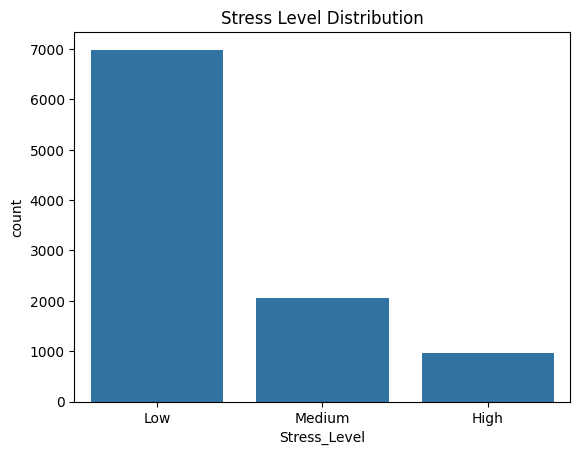

In [ ]:
sns.countplot(x="Stress_Level", data=health_df)
plt.title("Stress Level Distribution")
plt.show()

In [ ]:
print(health_df["Stress_Level"].value_counts(normalize=True))

Stress_Level
Low       0.6989
Medium    0.2050
High      0.0961
Name: proportion, dtype: float64


Numerical Features Analysis

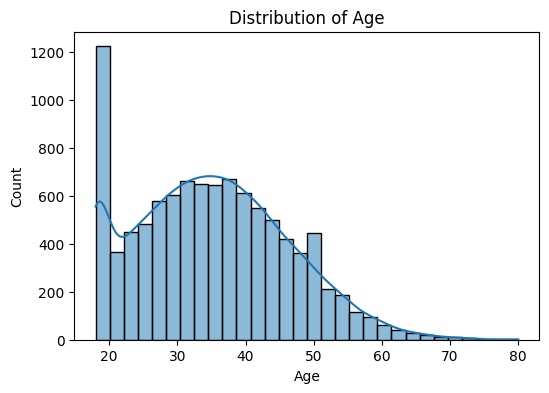

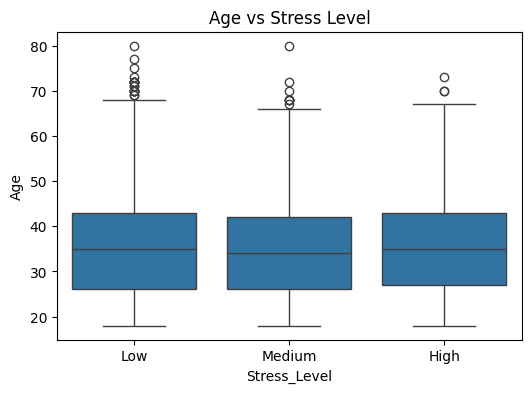

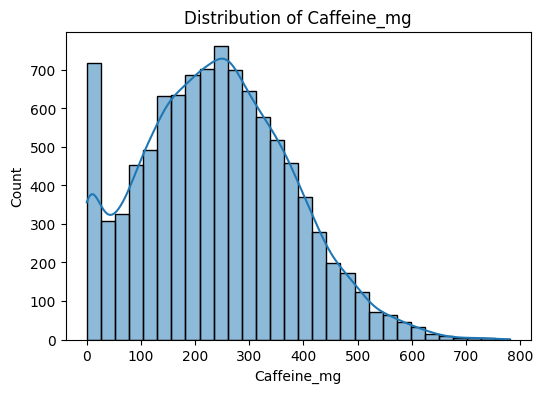

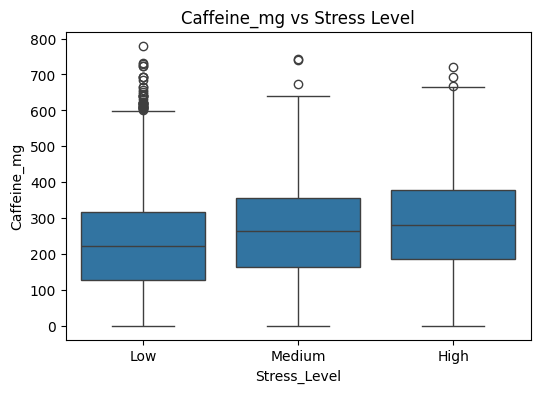

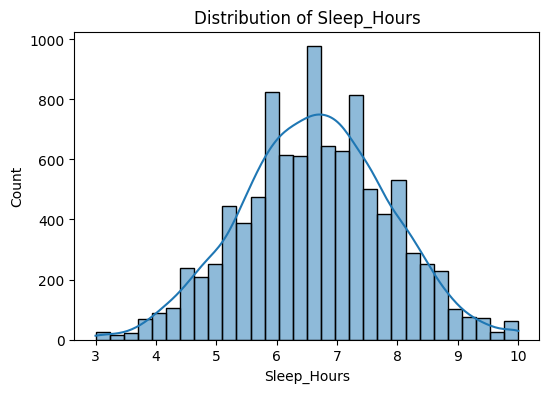

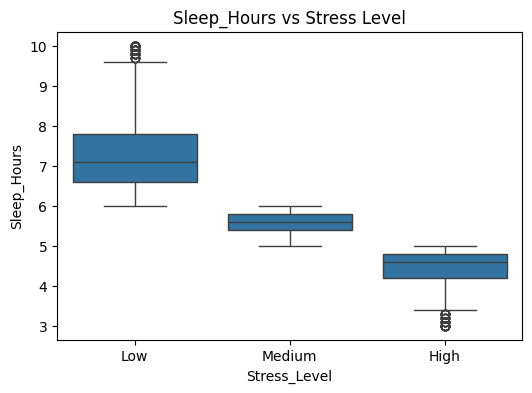

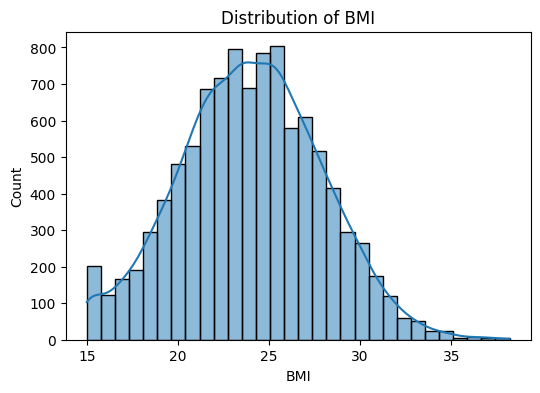

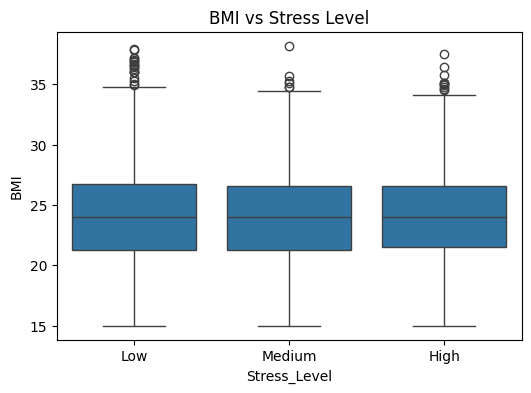

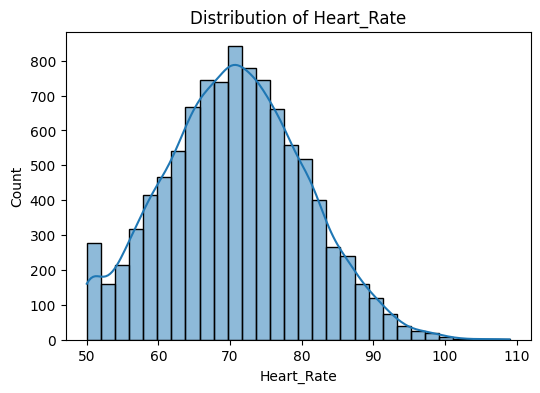

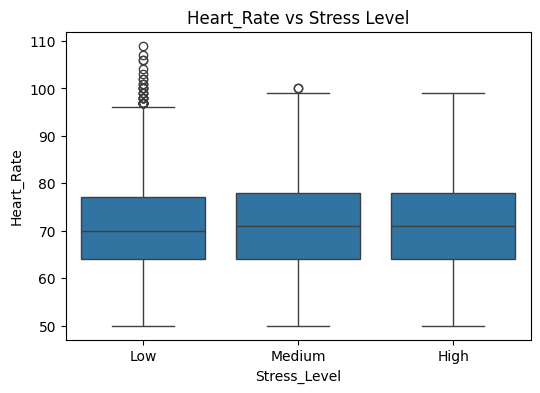

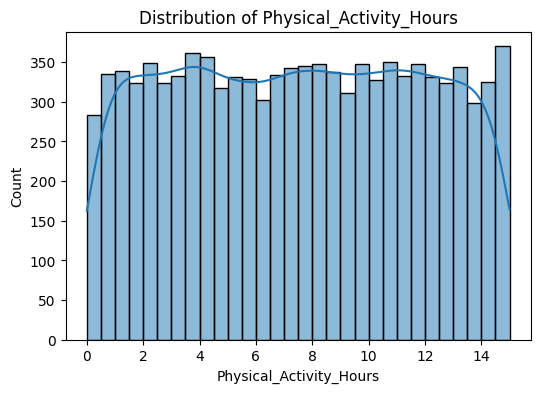

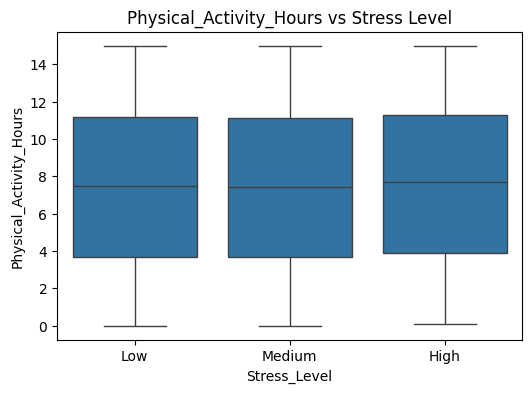

In [ ]:
num_cols = ["Age", "Caffeine_mg", "Sleep_Hours",
            "BMI", "Heart_Rate", "Physical_Activity_Hours"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(health_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x="Stress_Level", y=col, data=health_df)
    plt.title(f"{col} vs Stress Level")
    plt.show()

Categorical Features Analysis

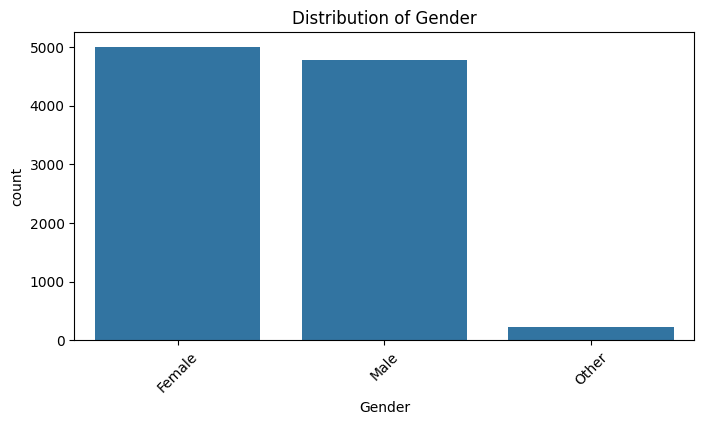

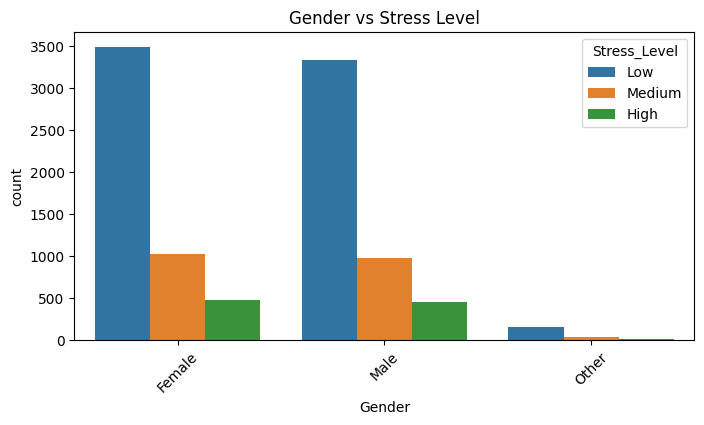

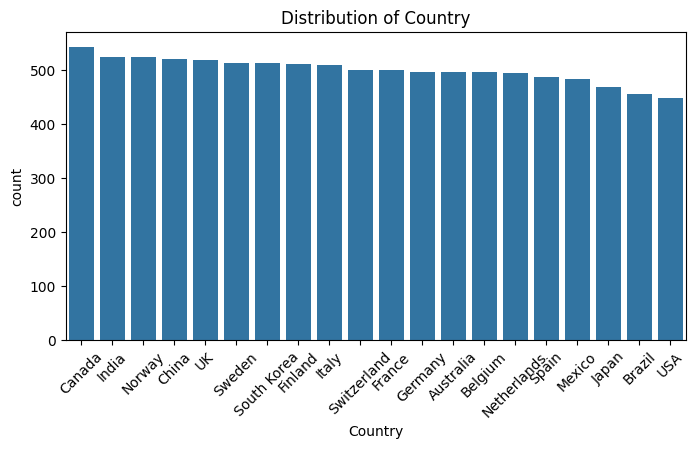

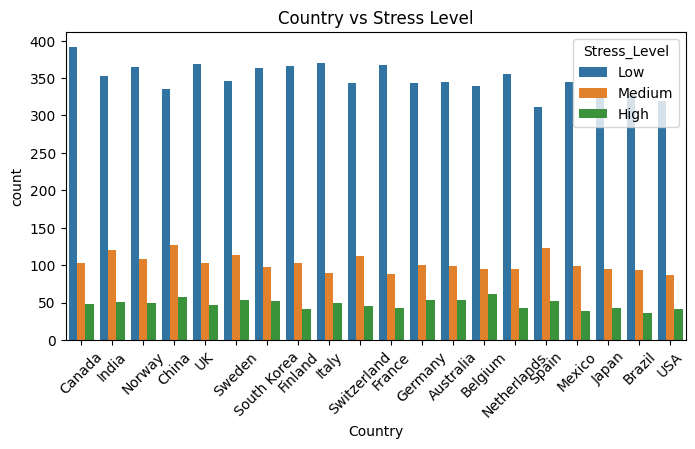

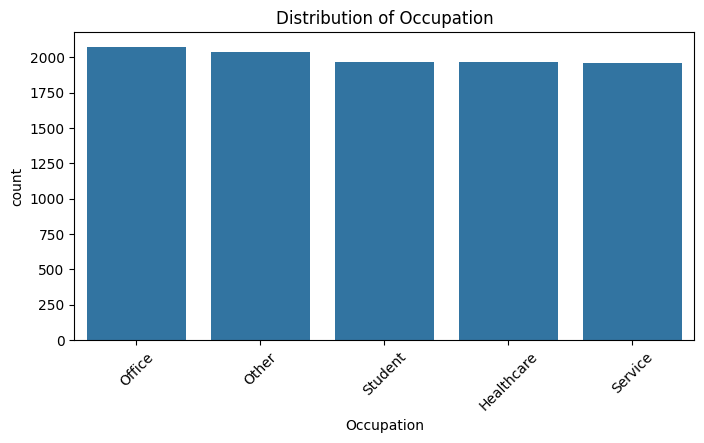

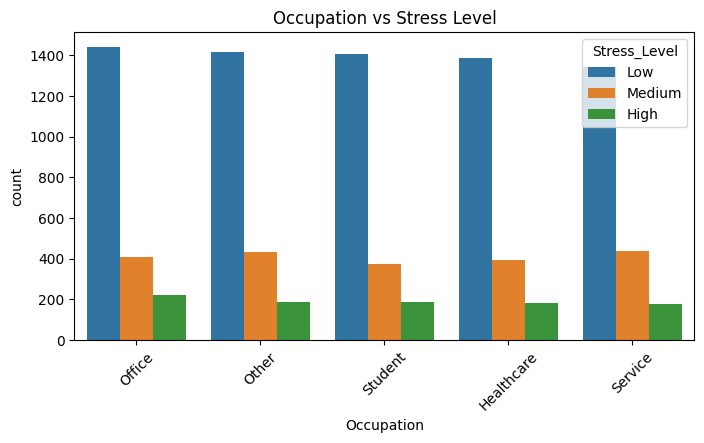

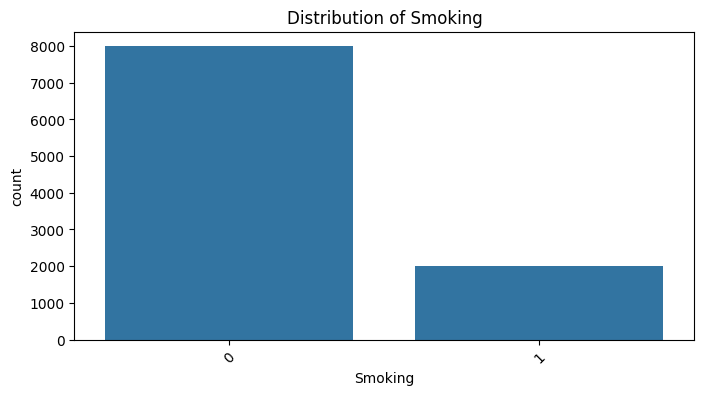

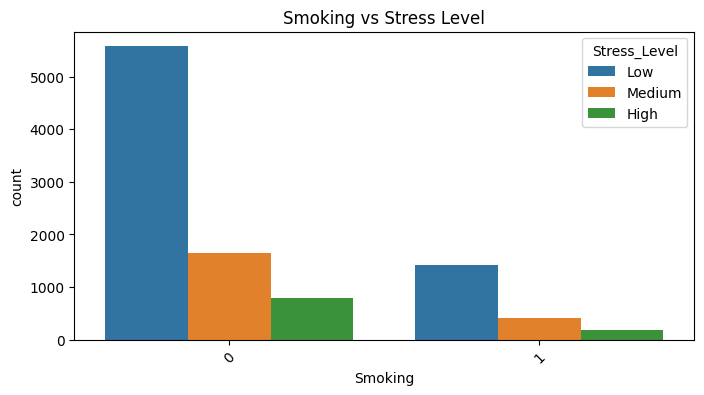

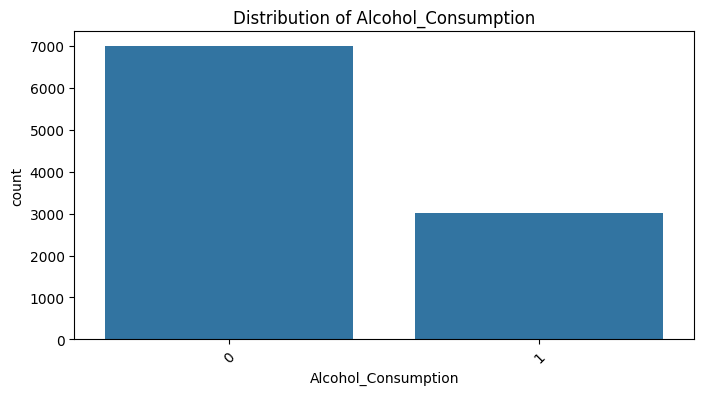

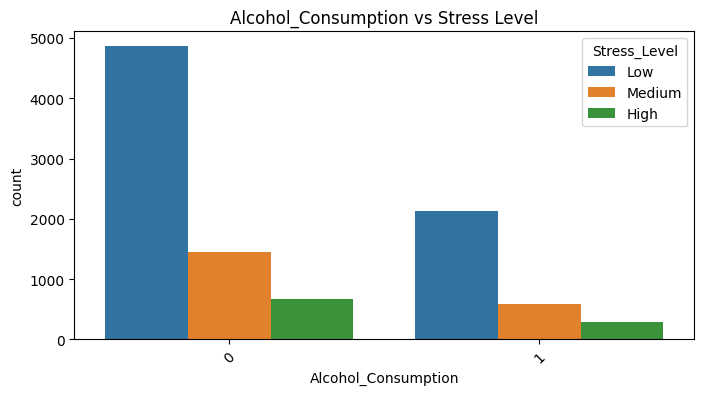

In [ ]:
cat_cols = ["Gender", "Country", "Occupation", "Smoking", "Alcohol_Consumption"]

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col,
                  data=health_df,
                  order=health_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(8,4))
    sns.countplot(x=col,
                  hue="Stress_Level",
                  data=health_df,
                  order=health_df[col].value_counts().index)
    plt.title(f"{col} vs Stress Level")
    plt.xticks(rotation=45)
    plt.show()


Correlation Analysis

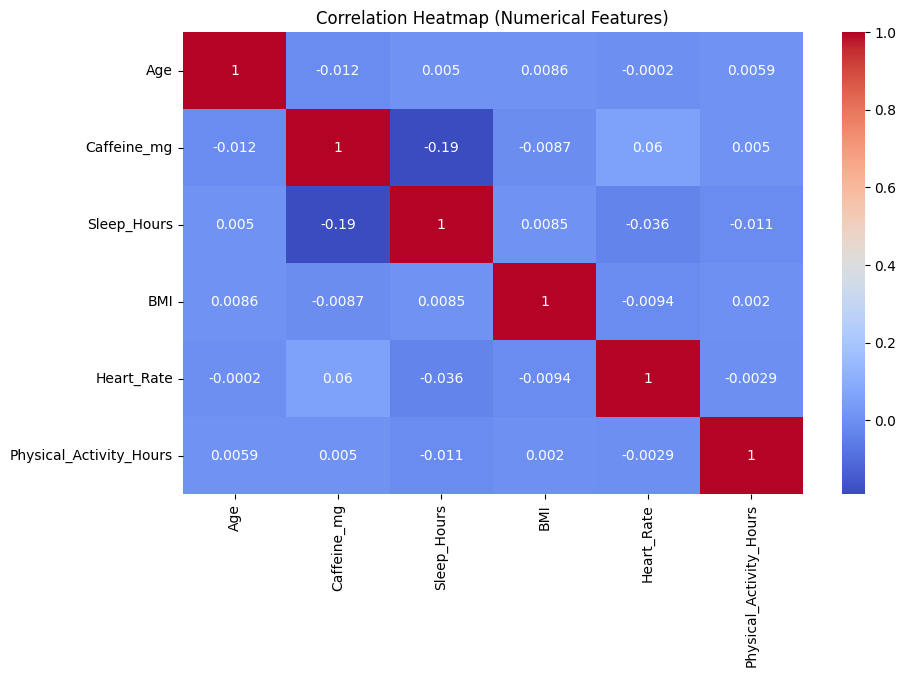

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(health_df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

Country Insights

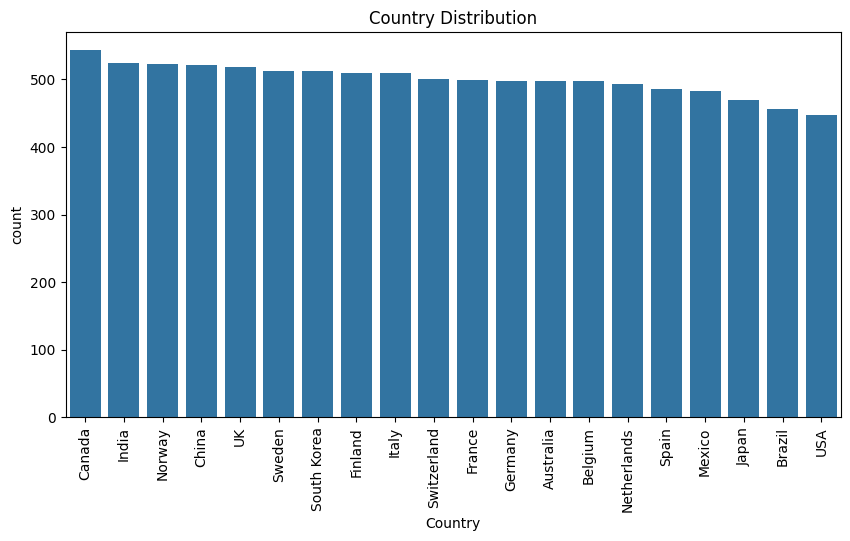

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Country", data=health_df, order=health_df["Country"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Country Distribution")
plt.show()

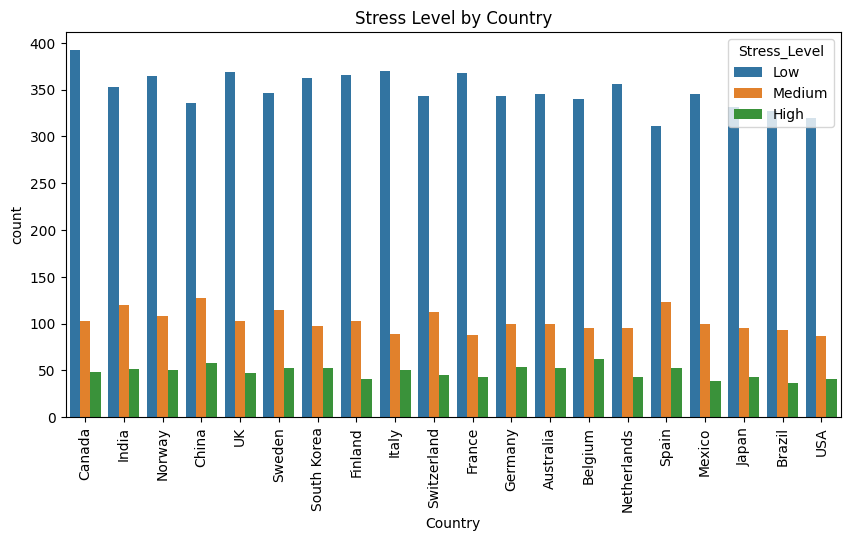

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Country", hue="Stress_Level", data=health_df, order=health_df["Country"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Stress Level by Country")
plt.show()

Pairplots / Multivariate Visualization

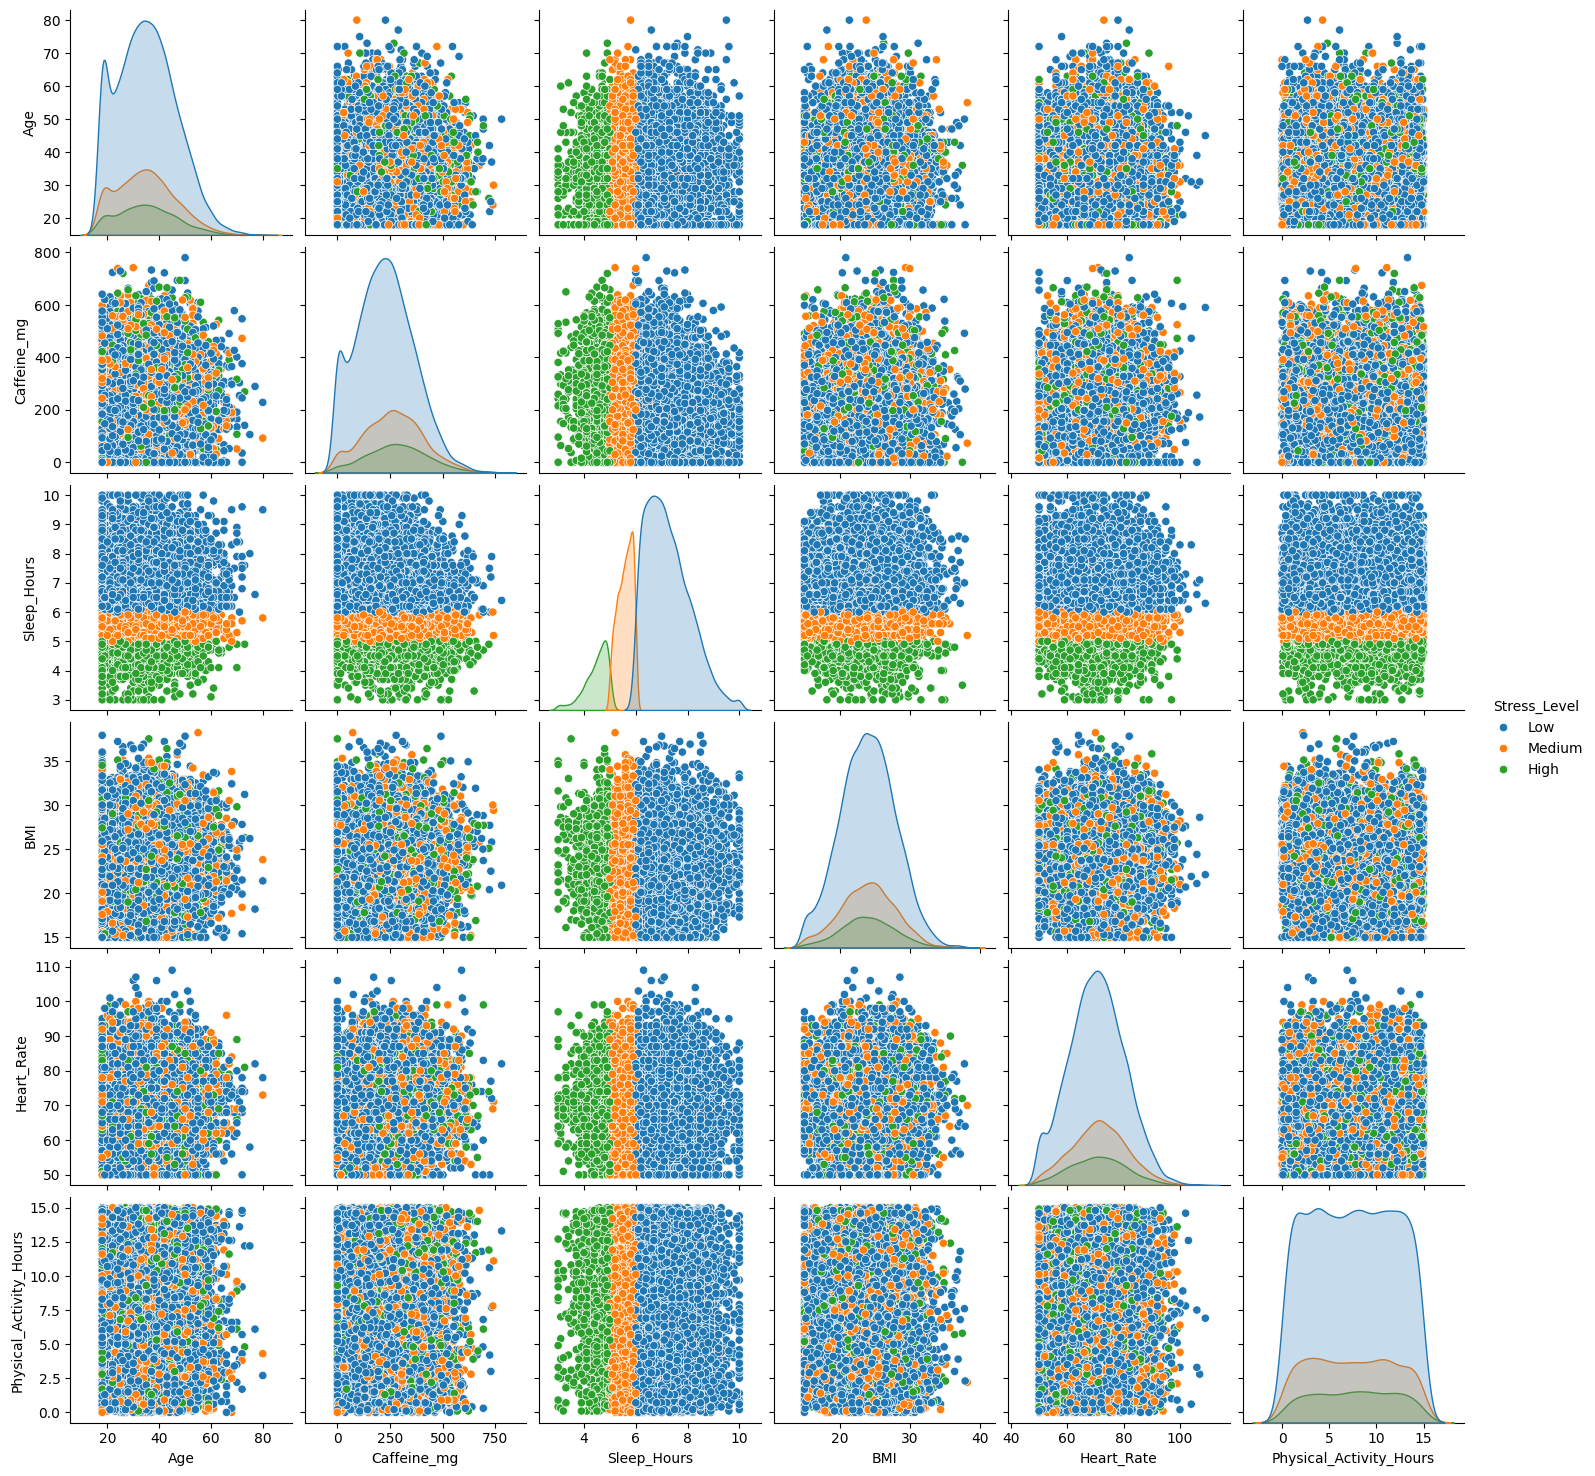

In [ ]:
vars = ["Age", "Caffeine_mg", "Sleep_Hours",
        "BMI", "Heart_Rate", "Physical_Activity_Hours"]
sns.pairplot(health_df, vars=vars, hue="Stress_Level")
plt.show()

Summary of Insights
-------------------
Stress_Level is imbalanced:
- Low: ~70%
- Medium: ~20%
- High: ~10%

This imbalance will cause most models (esp. Logistic Regression, SVM) to predict “Low” too often because it dominates

## Preprocessing

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Features and target
X = health_df.drop("Stress_Level", axis=1)
y = health_df["Stress_Level"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Identify columns
numeric_features = X.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Target encoding for Country + categorical
encoder = ce.TargetEncoder(cols=categorical_features)
X_train_enc = encoder.fit_transform(X_train, y_train)
X_test_enc = encoder.transform(X_test)

# Scale numeric features
scaler = StandardScaler()
X_train_enc[numeric_features] = scaler.fit_transform(X_train_enc[numeric_features])
X_test_enc[numeric_features] = scaler.transform(X_test_enc[numeric_features])

# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_enc, y_train)

print("Before SMOTE:", y_train.value_counts(normalize=True))
print("-"*32)
print("After SMOTE:", y_train_res.value_counts(normalize=True))

Before SMOTE: Stress_Level
Low       0.698875
Medium    0.205000
High      0.096125
Name: proportion, dtype: float64
--------------------------------
After SMOTE: Stress_Level
Medium    0.333333
Low       0.333333
High      0.333333
Name: proportion, dtype: float64


## Modeling

### Logistic Regression (Target Encoding)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

## Evaluation - Logistic Regression

              precision    recall  f1-score   support

        High       0.95      1.00      0.97       192
         Low       1.00      0.98      0.99      1398
      Medium       0.94      0.97      0.96       410

    accuracy                           0.98      2000
   macro avg       0.96      0.99      0.97      2000
weighted avg       0.98      0.98      0.98      2000



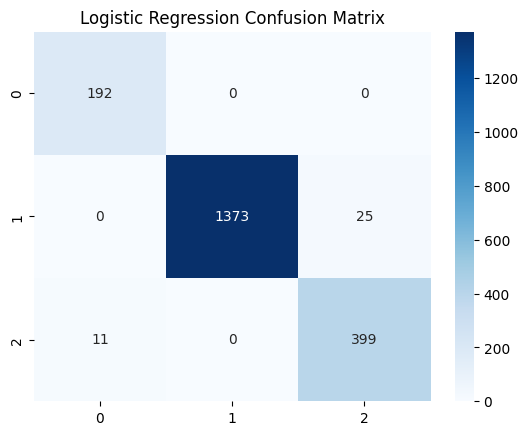

In [ ]:
y_pred = logreg.predict(X_test_enc)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### Support Vector Machine (Target Encoding)

In [ ]:
from sklearn.svm import SVC

# Model
svm_clf = SVC(kernel="rbf", class_weight="balanced", random_state=42)
svm_clf.fit(X_train_res, y_train_res)

SVC(class_weight='balanced', random_state=42)

## Evaluation - SVM

              precision    recall  f1-score   support

        High       0.93      0.98      0.95       192
         Low       1.00      0.98      0.99      1398
      Medium       0.92      0.96      0.94       410

    accuracy                           0.97      2000
   macro avg       0.95      0.97      0.96      2000
weighted avg       0.98      0.97      0.97      2000



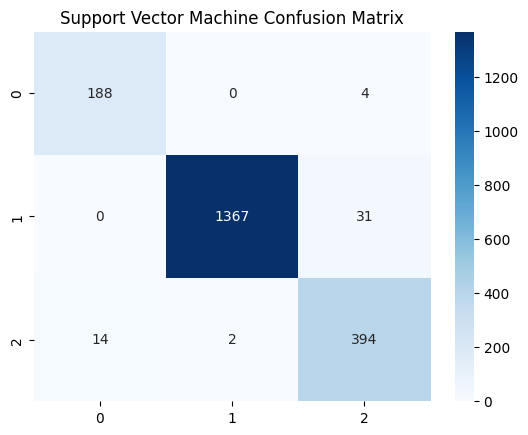

In [ ]:
y_pred = svm_clf.predict(X_test_enc)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

## Conclusion

Lifestyle factors such as sleep hours, caffeine intake, BMI, and physical activity strongly influence stress levels. Both Logistic Regression and Support Vector Machine performed well, achieving high accuracy and balanced precision/recall across classes. Logistic Regression slightly outperformed SVM in this case, particularly on the minority “High” stress class.

This project shows how machine learning can be used to detect stress from lifestyle data, supporting the development of wellness applications that encourage healthier daily habits.

While Logistic Regression achieved slightly higher overall accuracy (98%) compared to SVM (97%), both models proved effective for predicting stress levels.